# Notebook for exploring the Chinese-English Dictionary

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load words table
colnames = ['id', 'simplified', 'traditional', 'pinyin', 
            'english', 'grammar', 'concept_cn', 'concept_en', 
            'domain_cn', 'domain_en', 'subdomain_cn', 'subdomain_en',
            'image', 'mp3', 'notes', 'headword']
types = {'id': np.uint32, 'simplified': np.object, 'traditional': np.object, 
        'pinyin': np.object, 'english': np.object, 'grammar': np.object,
        'concept_cn': np.object, 'concept_en': np.object,
        'domain_cn': np.object, 'domain_en': np.object, 'subdomain_cn': np.object,
         'subdomain_en': np.object, 'image': np.object, 'mp3': np.object,
         'notes': np.object, 'headword': np.uint32}
df = pd.read_table('../data/words.txt', names=colnames, dtype=types)
df['id'].count() # Number of lexical units

45380

In [3]:
# Example row
df[df.simplified == '佛']

,id,simplified,traditional,pinyin,english,grammar,concept_cn,concept_en,domain_cn,domain_en,subdomain_cn,subdomain_en,image,mp3,notes,headword
3617,3618,佛,\N,fó,Buddha / Awakened One,proper noun,\N,\N,佛教,Buddhism,\N,\N,foshixiang_nqi400.jpg,fo2.mp3,MC: bjut; one of the ten epithets of a Buddha ...,3618
3618,3619,佛,\N,fó,Buddhist / of Buddhism,adjective,\N,\N,佛教,Buddhism,\N,\N,foshixiang_nqi400.jpg,fo2.mp3,(CCD '佛' 1; FE '佛' 2),3618


In [4]:
# Counts for different parts of speech
df['grammar'].value_counts()

noun              17609
verb               9930
proper noun        9102
adjective          3972
phrase             1567
adverb              787
set phrase          718
measure word        305
pronoun             214
conjunction         196
phonetic            189
number              113
foreign             111
particle            102
preposition          97
\N                   86
onomatopoeia         70
interjection         55
ordinal              35
pattern              30
auxiliary verb       25
suffix               21
bound form           19
expression           10
prefix               10
radical               5
infix                 2
Name: grammar, dtype: int64

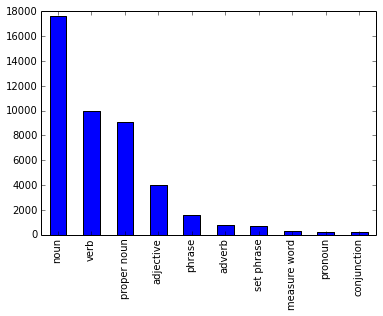

In [5]:
# Histogram for different parts of speech
df['grammar'].value_counts()[:10].plot(kind='bar')

In [6]:
# Counts for lexical units of different domains
df['domain_en'].value_counts()

Classical Chinese         7877
Buddhism                  4959
History                   2654
Actions                   1544
Condition                 1099
Places                     990
Geography                  876
Emotion                    803
Language                   791
Thought                    790
Health                     773
Quantity                   722
Information Technology     719
Time                       654
Characteristic             641
Food and Drink             621
Function Words             608
Idiom                      586
Form                       567
Art                        550
Linguistics                473
Names                      442
Religion                   412
Movement                   403
Ethics                     398
Work                       381
Architecture               367
Position                   367
Nature                     350
Law                        347
                          ... 
Computer Science            16
Chinese 

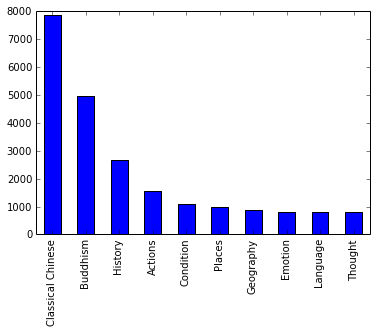

In [8]:
# Histogram for different domains
df['domain_en'].value_counts()[:10].plot(kind='bar')

In [11]:
# Unique headwords
len(df['headword'].unique())

37015